<a href="https://colab.research.google.com/github/Dollyp1205/Marketing-Research-Methods---Dolly-Poddar--Jio-Institute/blob/Session-11/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Install required packages
!pip install mlxtend pandas numpy

# Import necessary libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from collections import Counter

# Read the CSV file
df = pd.read_csv('/content/market basket analysis.csv')

# Function to clean and prepare the data
def prepare_data(df):
    # Get all product columns
    product_cols = [col for col in df.columns if 'Product' in col]

    # Create a list of all products (excluding NaN)
    all_products = []
    for col in product_cols:
        all_products.extend(df[col].dropna().values)

    # Count product frequencies to identify hero products
    product_counts = Counter(all_products)

    # Convert to DataFrame for better visualization
    product_freq = pd.DataFrame.from_dict(product_counts, orient='index', columns=['frequency'])
    product_freq = product_freq.sort_values('frequency', ascending=False)

    print("Top 10 Most Frequent Products (Hero Products):")
    print(product_freq.head(10))

    return product_freq, product_cols

# Function to create transaction list
def create_transactions(df, product_cols):
    transactions = []
    for _, row in df.iterrows():
        transaction = [item for item in row[product_cols] if pd.notna(item)]
        transactions.append(transaction)
    return transactions

# Function to perform market basket analysis
def create_transactions(df, product_cols):
    transactions = []
    for _, row in df.iterrows():
        transaction = [item for item in row[product_cols] if pd.notna(item)]
        # Ensure unique items within a transaction by converting to a set and back to list
        transactions.append(list(set(transaction)))
    return transactions

    # Generate frequent itemsets
    frequent_itemsets = apriori(te, min_support=0.01, use_colnames=True)

    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    # Sort rules by confidence
    rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])

    return rules

# Function to analyze product combinations with hero products
def analyze_hero_product_combinations(rules, product_freq, top_n=5):
    hero_products = product_freq.head(10).index.tolist()

    print("\nTop Product Combinations with Hero Products:")
    for hero in hero_products:
        print(f"\nHero Product: {hero}")

        # Filter rules containing the hero product as antecedent
        hero_rules = rules[rules['antecedents'].apply(lambda x: hero in x)]

        if not hero_rules.empty:
            print("Top 5 products frequently bought together:")
            for _, rule in hero_rules.head(5).iterrows():
                consequents = list(rule['consequents'])
                print(f"- Products: {consequents}")
                print(f"  Confidence: {rule['confidence']:.2%}")
                print(f"  Lift: {rule['lift']:.2f}")
        else:
            print("No significant combinations found")

# Main execution
def main():
    # Prepare data
    product_freq, product_cols = prepare_data(df)

    # Create transactions
    transactions = create_transactions(df, product_cols)

    # Perform market basket analysis
    rules = perform_market_basket_analysis(transactions)

    # Analyze hero product combinations
    analyze_hero_product_combinations(rules, product_freq)

    # Save results to CSV
    rules.to_csv('market_basket_analysis_results.csv', index=False)
    print("\nDetailed results have been saved to 'market_basket_analysis_results.csv'")

# Run the analysis
if __name__ == "__main__":
    main()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 10 Most Frequent Products (Hero Products):
                  frequency
whole milk             2513
other vegetables       1903
rolls/buns             1809
soda                   1715
yogurt                 1372
bottled water          1087
root vegetables        1072
tropical fruit         1032
shopping bags           969
sausage                 924


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Top Product Combinations with Hero Products:

Hero Product: whole milk
Top 5 products frequently bought together:
- Products: ['other vegetables']
  Confidence: 49.36%
  Lift: 2.65
- Products: ['other vegetables']
  Confidence: 49.23%
  Lift: 2.65
- Products: ['other vegetables']
  Confidence: 48.35%
  Lift: 2.60
- Products: ['other vegetables']
  Confidence: 46.61%
  Lift: 2.51
- Products: ['other vegetables']
  Confidence: 45.91%
  Lift: 2.47

Hero Product: other vegetables
Top 5 products frequently bought together:
- Products: ['whole milk']
  Confidence: 59.65%
  Lift: 2.47
- Products: ['whole milk']
  Confidence: 58.42%
  Lift: 2.42
- Products: ['whole milk']
  Confidence: 58.17%
  Lift: 2.41
- Products: ['whole milk']
  Confidence: 55.80%
  Lift: 2.31
- Products: ['whole milk']
  Confidence: 54.32%
  Lift: 2.25

Hero Product: rolls/buns
Top 5 products frequently bought together:
- Products: ['whole milk']
  Confidence: 49.80%
  Lift: 2.07
- Products: ['other vegetables']
  Confi

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Top 10 Products:
            Product  Frequency
0        whole milk       2513
1  other vegetables       1903
2        rolls/buns       1809
3              soda       1715
4            yogurt       1372
5     bottled water       1087
6   root vegetables       1072
7    tropical fruit       1032
8     shopping bags        969
9           sausage        924


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


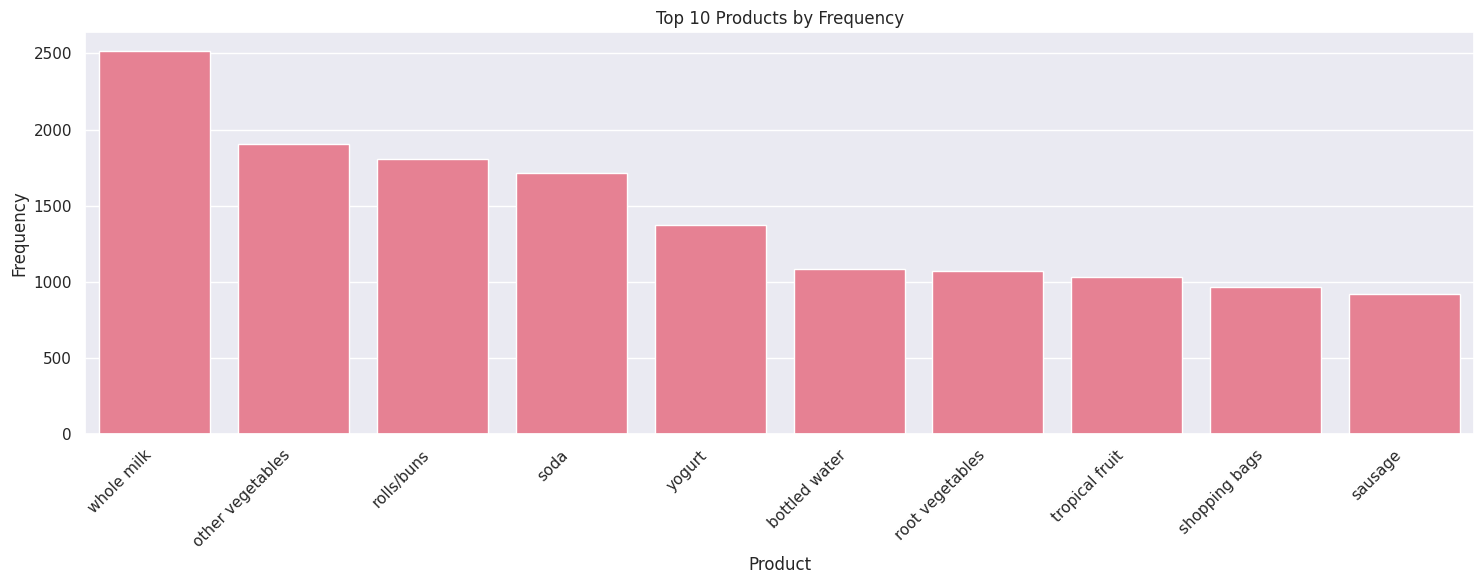

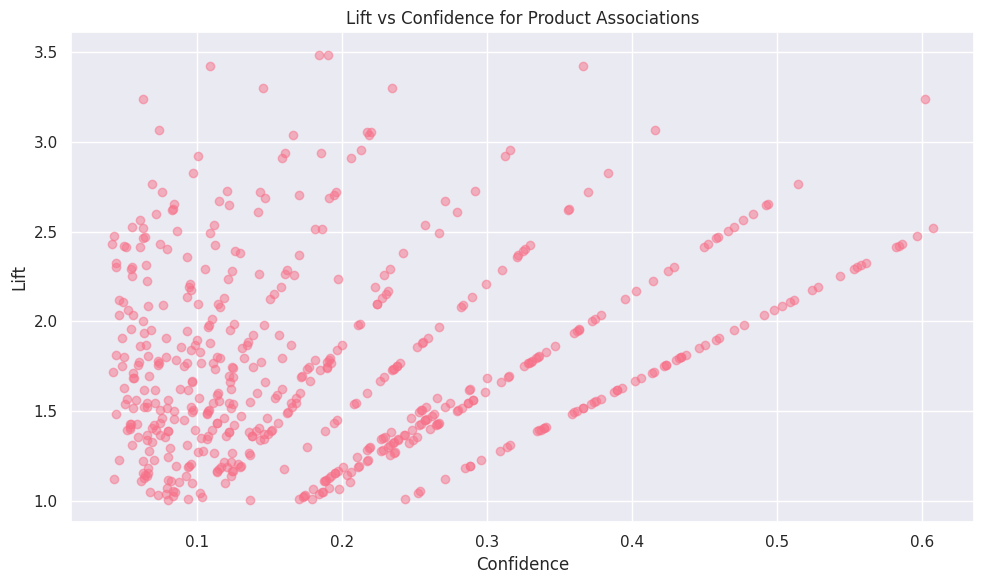


Analysis complete! Results have been saved to CSV files.

Top 10 Product Associations:

Products frequently bought together:

Rule 421:
If customer buys: ['yogurt', 'root vegetables']
They also buy: ['whole milk']
Confidence: 60.73%
Lift: 2.52

Rule 468:
If customer buys: ['tropical fruit', 'root vegetables']
They also buy: ['other vegetables']
Confidence: 60.21%
Lift: 3.24

Rule 498:
If customer buys: ['curd', 'other vegetables']
They also buy: ['whole milk']
Confidence: 59.65%
Lift: 2.47

Rule 402:
If customer buys: ['curd', 'yogurt']
They also buy: ['whole milk']
Confidence: 58.58%
Lift: 2.43

Rule 481:
If customer buys: ['other vegetables', 'butter']
They also buy: ['whole milk']
Confidence: 58.42%
Lift: 2.42


In [18]:
# Install required packages
!pip install mlxtend pandas numpy seaborn plotly

import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Read the data
df = pd.read_csv('/content/market basket analysis.csv')

# Get product columns
product_cols = [col for col in df.columns if 'Product' in col]

# Create list of all products (excluding NaN)
all_products = []
for col in product_cols:
    products = df[col].dropna().values
    all_products.extend(products)

# Get product frequencies
product_freq = pd.DataFrame(pd.Series(all_products).value_counts()).reset_index()
product_freq.columns = ['Product', 'Frequency']

# Print top 10 products
print("\nTop 10 Products:")
print(product_freq.head(10))

# Create transactions list
transactions = []
for _, row in df.iterrows():
    transaction = [item for item in row[product_cols] if pd.notna(item)]
    transactions.append(transaction)

# Create one-hot encoded DataFrame
one_hot = pd.DataFrame([pd.Series(1, index=list(set(t))) for t in transactions]).fillna(0)
# Generate frequent itemsets
frequent_itemsets = apriori(one_hot, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])

# Visualize top products
plt.figure(figsize=(15, 6))
sns.barplot(data=product_freq.head(10), x='Product', y='Frequency')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Products by Frequency')
plt.tight_layout()
plt.show()

# Create interactive bar chart
fig = px.bar(product_freq.head(20),
             x='Product',
             y='Frequency',
             title='Top 20 Products by Purchase Frequency')
fig.update_xaxes(tickangle=45)
fig.show()

# Create scatter plot of lift vs confidence
plt.figure(figsize=(10, 6))
plt.scatter(rules['confidence'], rules['lift'], alpha=0.5)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Lift vs Confidence for Product Associations')
plt.tight_layout()
plt.show()

# Create interactive table for top associations
top_rules = rules.head(10).copy()
top_rules['antecedents'] = top_rules['antecedents'].apply(lambda x: list(x))
top_rules['consequents'] = top_rules['consequents'].apply(lambda x: list(x))

fig = go.Figure(data=[go.Table(
    header=dict(values=['Antecedents', 'Consequents', 'Support', 'Confidence', 'Lift'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[top_rules['antecedents'],
                      top_rules['consequents'],
                      top_rules['support'].round(3),
                      top_rules['confidence'].round(3),
                      top_rules['lift'].round(2)],
              fill_color='lavender',
              align='left'))
])
fig.update_layout(title='Top 10 Product Associations')
fig.show()

# Save results to CSV
rules.to_csv('market_basket_results.csv', index=False)
product_freq.to_csv('product_frequencies.csv', index=False)

print("\nAnalysis complete! Results have been saved to CSV files.")

# Print top associations
print("\nTop 10 Product Associations:")
print("\nProducts frequently bought together:")
for idx, row in top_rules.head().iterrows():
    print(f"\nRule {idx+1}:")
    print(f"If customer buys: {row['antecedents']}")
    print(f"They also buy: {row['consequents']}")
    print(f"Confidence: {row['confidence']:.2%}")
    print(f"Lift: {row['lift']:.2f}")